# Linear Regression

## Problem: Housing Price Prediction

Dataset used: https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction?select=Housing.csv

This dataset provides key features for predicting house prices, including area, bedrooms, bathrooms, stories, amenities like air conditioning and parking, and information on furnishing status. It enables analysis and modelling to understand the factors impacting house prices and develop accurate predictions in real estate markets.


In [225]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('datasets/housing-price-prediction.csv')
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [226]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


You would like to fit a linear regression model through these two points, so you can then predict price for other houses - say, a house with 1200 sqft.

In [227]:
# x_train is the input variable (size square feet)
x_train = df['area'].to_numpy()
# y_train is the target (price in 1000s of dollars)
y_train = df['price'].to_numpy()

In [228]:
# m is the number of training examples
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0] # len(x_train) would also work
print(f"Number of training examples is: {m}")

x_train.shape: (545,)
Number of training examples is: 545


### Plotting the data

You can plot these two points using the scatter() function in the matplotlib library, as shown in the cell below.

- The function arguments marker and c show the points as red crosses (the default is blue dots).

You can use other functions in the matplotlib library to set the title and labels to display

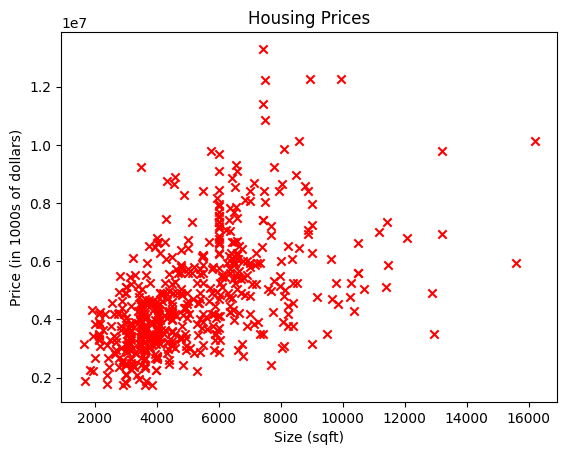

In [229]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (sqft)')
plt.show()

### Model Function

Fhe model function for linear regression (which is a function that maps from `x` to `y`) is represented as 

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

The formula above is how you can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot.

Let's try to get a better intuition for this through the code blocks below. Let's start with $w = 100$ and $b = 100$. 

**Note: You can come back to this cell to adjust the model's w and b parameters**

In [230]:
w = 800
b = 1250
print(f"w: {w}")
print(f"b: {b}")

def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      f_wb (ndarray (m,)): model prediction
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

w: 800
b: 1250


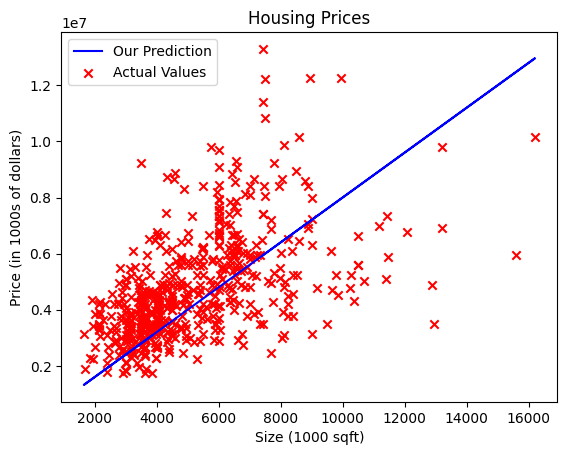

In [231]:
tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

As you can see, setting $w = 100$ and $b = 100$ does *not* result in a line that fits our data. 

### Prediction

Now that we have a model, we can use it to make our original prediction. Let's predict the price of a house with 1200 sqft.

In [232]:
w = 800                         
b = 1250    
x_i = 1200
cost_1200sqft = w * x_i + b    

print(f"${cost_1200sqft:.0f} thousand dollars")

$961250 thousand dollars


## Conclusion

Linear regression builds a model which establishes a relationship between features and targets

- In the example above, the feature was house size and the target was house price
- for simple linear regression, the model has two parameters  𝑤
  and  𝑏
  whose values are 'fit' using training data.
- once a model's parameters have been determined, the model can be used to make predictions on novel data.